# Prediction using Unsupervised ML

<font color=orange> Problem Statement : </font> From the given ‘Iris’ dataset, need to predict the optimum number of clusters and represent it visually.

In [15]:
#importing required python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sc

In [3]:
#import datasets
iris_data = pd.read_csv('iris.csv')

In [4]:
#Reading datasets
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#check number of unique values in Species
iris_data['Species'].nunique()

3

In [8]:
# Convert Categorical feature "Species" to numerical features
iris_data['Species'] = iris_data['Species'].apply(lambda x: 0 if x == "Iris-setosa" else x)
iris_data['Species'] = iris_data['Species'].apply(lambda x: 1 if x == "Iris-versicolor" else x)
iris_data['Species'] = iris_data['Species'].apply(lambda x: 2 if x == "Iris-virginica" else x)

In [12]:
iris_data = iris_data.drop(['Id'], axis=1)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Text(0, 0.5, 'Euclidean distance')

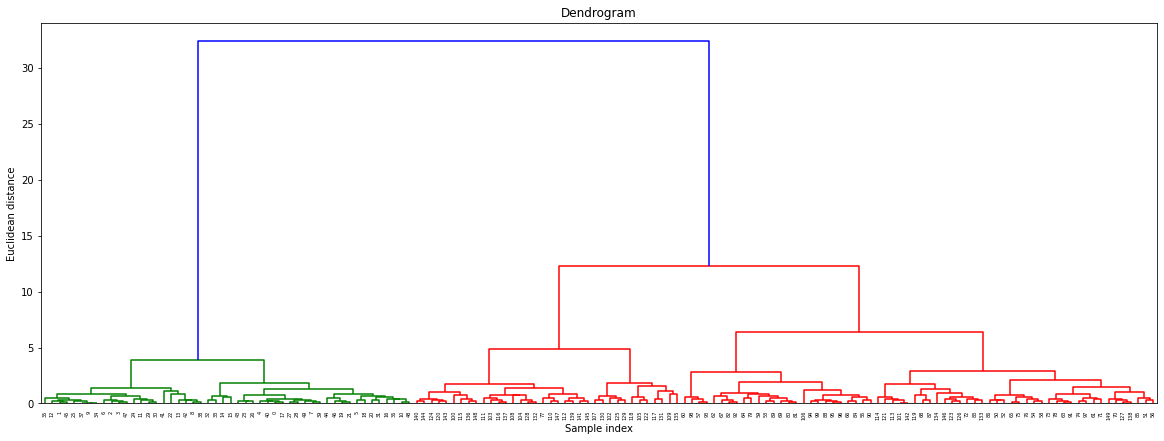

In [17]:
#create a dentogram

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(iris_X, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

We can cut the dentogram to obtain three clusters

In [19]:
#Fiting the model
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(iris_X)
labels = cluster.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

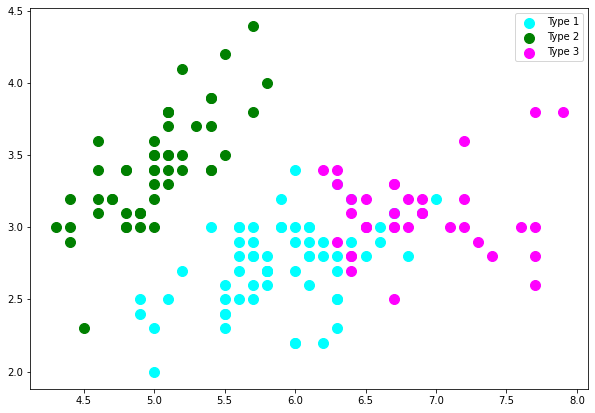

In [21]:
#visualizing the cluster
plt.figure(figsize=(10, 7))
plt.scatter(iris_X[labels == 0, 0], iris_X[labels == 0, 1], s = 100, c = 'cyan', label = 'Type 1')
plt.scatter(iris_X[labels == 1, 0], iris_X[labels == 1, 1], s = 100, c = 'green', label = 'Type 2')
plt.scatter(iris_X[labels == 2, 0], iris_X[labels == 2, 1], s = 100, c = 'magenta', label = 'Type 3')
plt.legend()
plt.show()